In [2]:
import pandas as pd
data=pd.read_csv('ML_DATASET.csv')
data

,date,precipitation,temp_max,temp_min,wind,weather
0,01-01-2012,0.0,12.8,5.0,4.7,drizzle
1,02-01-2012,10.9,10.6,2.8,4.5,rain
2,03-01-2012,0.8,11.7,7.2,2.3,rain
3,04-01-2012,20.3,12.2,5.6,4.7,rain
4,05-01-2012,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1456,27-12-2015,8.6,4.4,1.7,2.9,rain
1457,28-12-2015,1.5,5.0,1.7,1.3,rain
1458,29-12-2015,0.0,7.2,0.6,2.6,fog
1459,30-12-2015,0.0,5.6,-1.0,3.4,sun


In [17]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,01-01-2012,0.0,12.8,5.0,4.7,drizzle
1,02-01-2012,10.9,10.6,2.8,4.5,rain
2,03-01-2012,0.8,11.7,7.2,2.3,rain
3,04-01-2012,20.3,12.2,5.6,4.7,rain
4,05-01-2012,1.3,8.9,2.8,6.1,rain


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [21]:
data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [6]:
# Features (X) and target (y)
X = data[['precipitation', 'temp_max', 'temp_min', 'wind']]
y = data['weather']


In [7]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=2)

In [10]:
# Create a decision tree classifier
model = DecisionTreeClassifier(criterion='entropy', random_state=42)

In [11]:
# Train the model
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [12]:
# Predict on the training set
predictions = model.predict(X_train)

In [13]:
# Print accuracy
accuracy = np.mean(predictions == y_train) * 100
print(f"Training Accuracy: {accuracy:.2f}%")

Training Accuracy: 99.70%


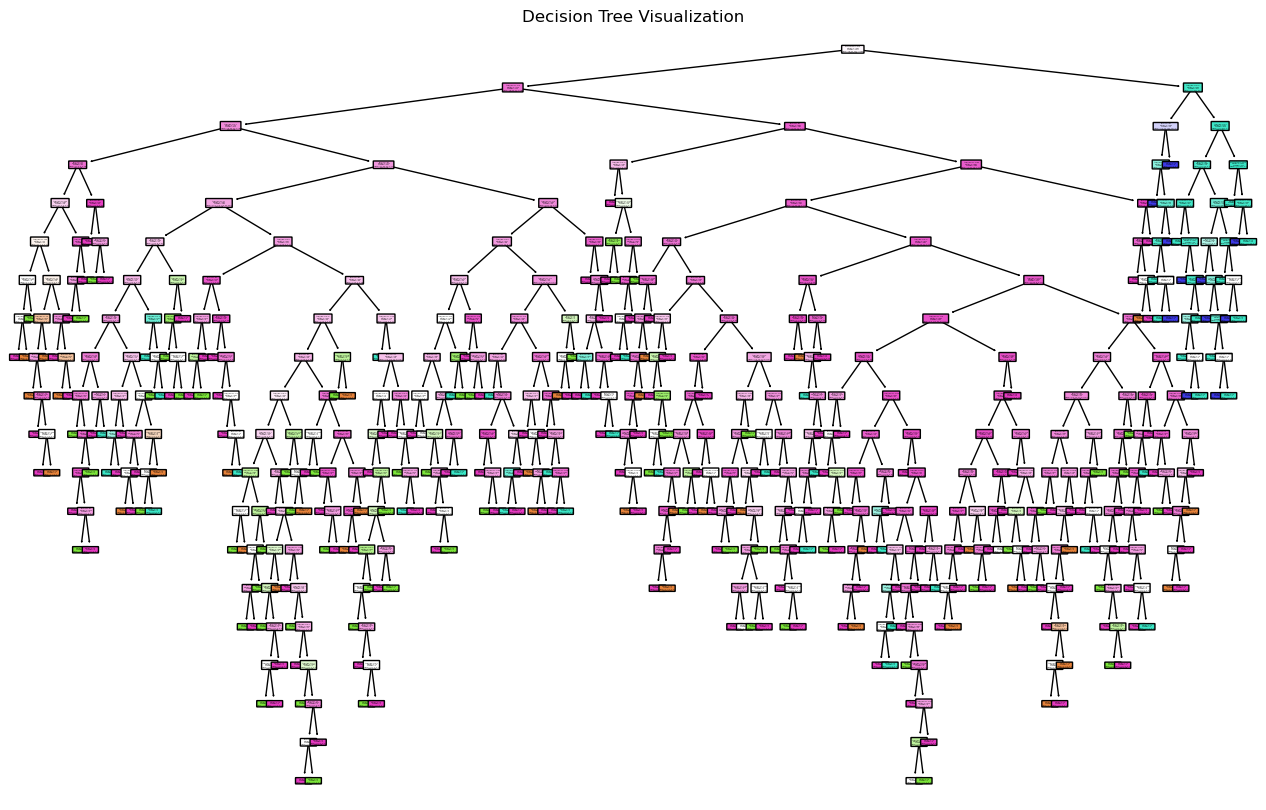

In [14]:
# Plot the decision tree
plt.figure(figsize=(16, 10))  # Adjust the figure size
plot_tree(model,
          feature_names=['precipitation', 'temp_max', 'temp_min', 'wind'],
          class_names=model.classes_,
          filled=True,
          rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

In [16]:
# Define a range of maximum depths to try
max_depth_range = range(1, 3)

# Create a DecisionTreeClassifier for each maximum depth and evaluate its accuracy
for depth in max_depth_range:
    print(f"\nEvaluating model with max depth = {depth}")
    dec = DecisionTreeClassifier(max_depth=depth, max_leaf_nodes=15, random_state=0)
    dec.fit(X_train, y_train)
    y_pred_dec = dec.predict(X_test)

    # Calculate the confusion matrix using the predicted and actual classes
    conf_matrix = confusion_matrix(y_test, y_pred_dec)
    
    # Print the confusion matrix to the console
    print("Confusion Matrix:")
    print(conf_matrix)

    # Print classification report
    print('Classification Report:\n', classification_report(y_test, y_pred_dec, zero_division=0))



Evaluating model with max depth = 1
Confusion Matrix:
[[ 0  0  0  0  5]
 [ 0  0  0  0  5]
 [ 0  0 76  0  3]
 [ 0  0  6  0  0]
 [ 0  0  0  0 52]]
Classification Report:
               precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00         5
         fog       0.00      0.00      0.00         5
        rain       0.93      0.96      0.94        79
        snow       0.00      0.00      0.00         6
         sun       0.80      1.00      0.89        52

    accuracy                           0.87       147
   macro avg       0.35      0.39      0.37       147
weighted avg       0.78      0.87      0.82       147


Evaluating model with max depth = 2
Confusion Matrix:
[[ 0  0  0  0  5]
 [ 0  0  0  0  5]
 [ 0  0 73  3  3]
 [ 0  0  0  6  0]
 [ 0  0  0  0 52]]
Classification Report:
               precision    recall  f1-score   support

     drizzle       0.00      0.00      0.00         5
         fog       0.00      0.00      0.00         5
        